# Building a Neural Network

## Introduction:

This project will cover what neural networks are and its implementation in Python for the tass of basic recognition. This project will also explore the domain of computer vision and how it is an automation of extracting information from digital images. There are a lot of applications for computer vision such as control systems to be used in industry, facial filters in mobile apps, or security surveillance systems.

Computer vision can also be broken down into the following:
- Content recognition (Object Identification, Object detection and localisation, Object and instance segmentation or Pose estimation).
- Video analysis (Instance Tracking, Action recognition, Motion estimation).
- Content-Aware image edition.
- Scene Reconstruction.

## Breakdown of this Notebook:
- Biological neuron and its mathematical model
- Building an ANN from scratch

## 1 - Biological neuron and its Mathematical model:

Artificial Neural Networks (ANNs) are great at processing information, finding patterns and approximating complex processes. This is largely due to its structure. The structure of ANNs are drawn from the biological neuron itself.

## 1.1 - Biological Neuron:

The following shows a neuron (act ass a simple signal processing unit) that forms part of our brain, where it is built up as a large complex network of neurons that are able to process sensory inputs from the environment and turn it into thoughts or actions. The way the neuron works is explained in the following:
- Dendrites -> are where the neuron will receive the electrical inputs, this are then propagated from the synapses to the soma.
- Some -> is the main body of the neuron and it accummulates the electrical stimulation to a certain threshold, until which it will become activated. This means that the electrical impulses would be propagated further down the axon.
- Axon -> is described as the output cable of these signals where it ends in multiple synapses. These synapses can be linked to other neurons. 

## 1.2 Mathematical Model of a Neuron:

Overall, an Artificial Neuron can take in several inputs, proceeds to sum them together and then by aplying an activation function to obtain the output signal. This process can be broken down into its mathematical components.

In [1]:
import os
from IPython.display import Image

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

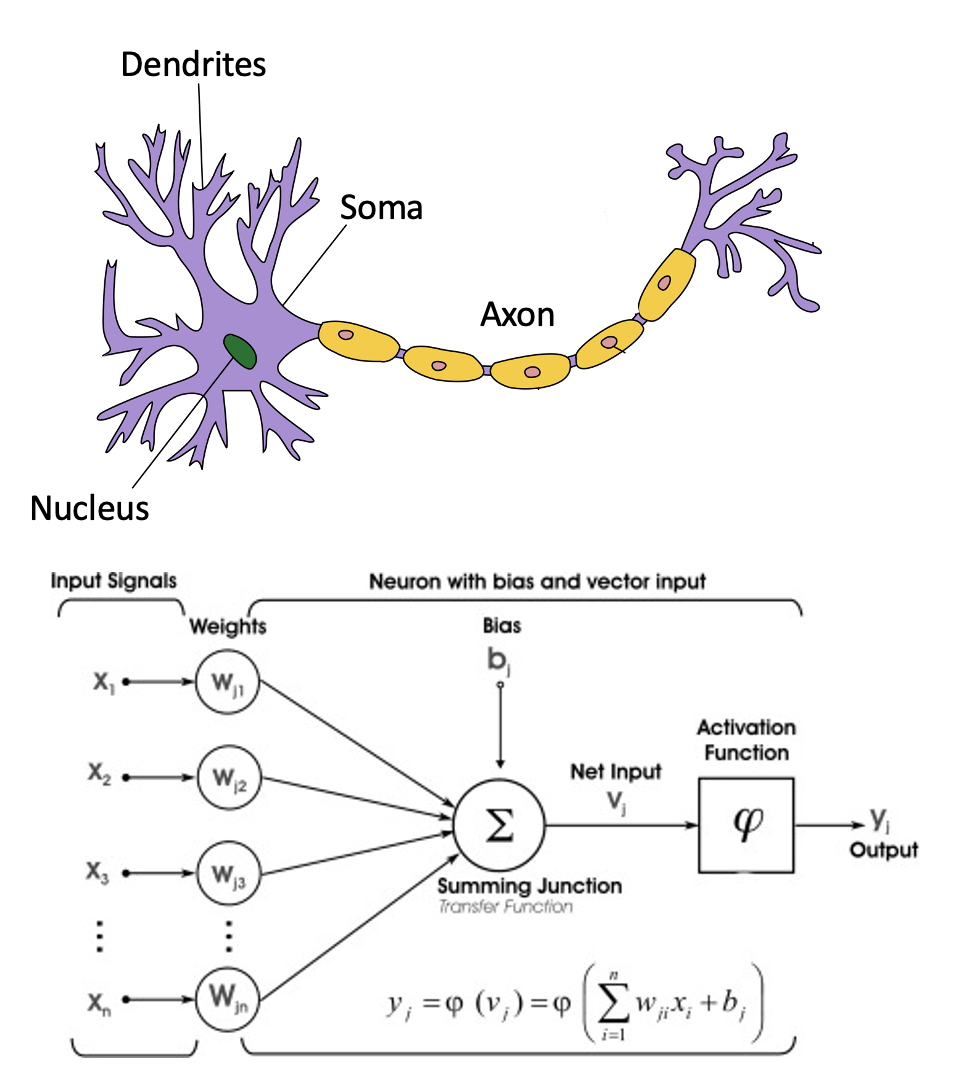

Image ref -> https://en.wikipedia.org/wiki/Neuron
Image ref -> https://www.sciencedirect.com/science/article/pii/S2214317316300427


In [2]:
# Neuron bio and math model: 
display(Image(image_path + 'Neuron bio and math model.png', width=700, unconfined=True))
print('Image ref -> https://en.wikipedia.org/wiki/Neuron')
print('Image ref -> https://www.sciencedirect.com/science/article/pii/S2214317316300427')

### Mathematical Description:

Firstly, the following vectors from the image above are shown as:

n = number of inputs
[$x_{1}$, $x_{2}$, ..., $x_{n}$] = Input Vector (represented as __X__) \
[$w_{j1}$, $w_{j2}$, ..., $w_{jn}$] = Weights that are bouded to the input connections of neuron "j" (represented as __W__). \
[$b_{1}$, $b_{2}$, ..., $b_{n}$] = Bias Vector (represented as __b__)\
[$y_{1}$, $y_{2}$, ..., $y_{n}$] = Ouput signal (represented as __Y__).

The neuron will take in an input vector (__X__) where it will then be weighted by the vector (__W__) to each of the input and be summed together with the bias __b__. This can be expressed as the following:

$V_{j}$ = __X__ * __W__ + __b__

where, 

 __X__ * __W__ + __b__ = $\sum\limits_{i=1}^{n} w_{ji} * x_{i} + b_{j}$ where j = 1, 2, ..., m

is a __Dot Product__ of the two vectors and the addition of the bias. The results of the sum is $V_{j}$ where it is then applied with am __Activation Function__ to obtain the neuron's output. 

Activation function is:

$Y_{j} = \varphi (V_{j})$

Here the Activation function is set to be a __Step Function__ meaning that if $V_{j}$ is less than the threshold (t), it will be set to 0 whereas if $V_{j}$ is more than the threshold (t), it will be set to 1. The Step Function is one of many types of activation functions that can be used, the following will list more examples of activation functions.

### Types of Activation Functions:

1. Sigmoid Function.
2. Hyperbolic Tangent function.
3. ReLU function.

For more information:
- https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/


## 2 - Building the Artificial neuron (perception):

In [3]:
# set the seed number:
seed_nb = 42

In [4]:
import numpy as np

In [5]:
class Neuron(object):
    """ This builds a simple feed foward artificial neuron.
    Args:
        - num_inputs (int): The number of input values or input vector size.
        - activation_func (callable): The activation function.
    Attributes:
        - W (ndarray): Weight values for each of the input.
        - b (float): The bias value, which is added to the weighted sum.
        - activation_func (callable): The activation function.
    """
    
    def __init__(self, num_inputs, activation_func):
        super().__init__()
        # Random initialisation of the weight vector and bias:
        self.W = np.random.rand(num_inputs)
        self.b = np.random.rand(1)
        self.activation_func = activation_func
    
    def forward(self, x):
        """ This builds the Forward pass of the input signal through the neuron.
        
        """
        
        z = np.dot(x, self.W) + self.b
        
        return self.activation_func(z)

## 2.1 - Test out the Artificial Neuron:

Instantiate the perceptron and forward some random input values through it.

In [6]:
# Set seed for reproducibility:
np.random.seed(seed_nb)

# Generate random input values: Shape of matrix is (1, 3)
x = np.random.rand(3).reshape(1, 3)
print('Input -> {}'.format(x))

# Instantiating the perceptron to pass the x input values:
# Create a step function:
step_func = lambda y: 0 if y <= 0 else 1

# Perceptron:
perceptron = Neuron(
    num_inputs = x.size, 
    activation_func = step_func
)

output = perceptron.forward(x)
print('Output is -> {}'.format(output))

Input -> [[0.37454012 0.95071431 0.73199394]]
Output is -> 1


## 3 - Layering the Neurons together:

Organising these individual neurons into a network of connected layers would improve its capabilities. This is where a set of neurons would take in an input vector and apply the same type of operation however, the dot products with the weigths are specific to each neuron. 

The diagram below is used to demonstrate a fully connected layer. For Neural Networks, the data will flow from the input layer through to the output layer, where between these will be one (or more) hidden layers. Starting wwith the Nodes A, B and C, this is the input layer and Nodes D, E, F and G resides in the hidden layer, lastly, Node H is the output/activation layer. 

Taking an input __X__ which has a size of 2 (meaning $x_{0}$ and $x_{1}$) in the first layer, the second layer which is the hidden layer will then take in these 3 activation values of the last layer as its inputs. Depending on the amount of hidden layers, this continues from one hidden layer to the next. These activated values will eventually reach the output layer, where here it is the 3rd layer in the network. For these layers where each of these neurons are connected to all the values from the previous layer can be termed as a __Fully Connected__ network.


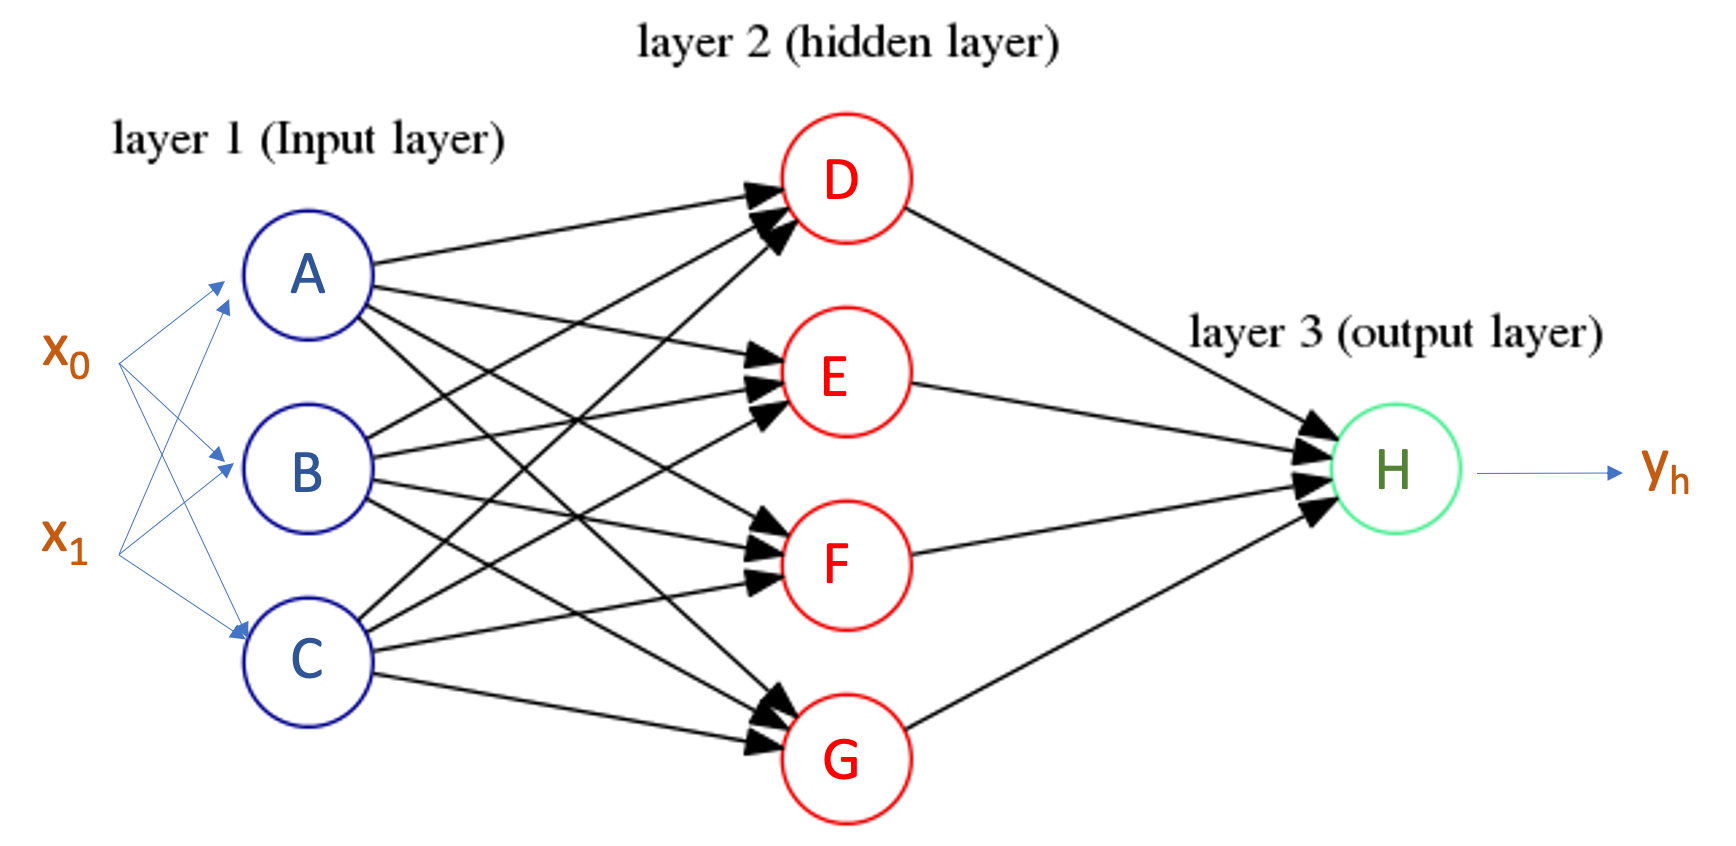

Image ref -> https://medium.com/emergent-future/spam-detection-using-neural-networks-in-python-9b2b2a062272


In [7]:
# Fully Connected Layer: 
display(Image(image_path + 'FullyConnectedLayer.png', width=700, unconfined=True))
print('Image ref -> https://medium.com/emergent-future/spam-detection-using-neural-networks-in-python-9b2b2a062272')

### Mathematical Description:

The following formulas are representing each of these elements as vectors (or matrices). 

Taking the __first layer__, where for each neuron in the this layer:

$z_{A}$ = x * $w_{A}$ + $b_{A}$ \
$z_{B}$ = x * $w_{B}$ + $b_{B}$ \
$z_{C}$ = x * $w_{C}$ + $b_{C}$

Overall, these can be combined and be expressed as the following:

z = x * __W__ + b

Further the following variables should be defined:

For the __Weight__ matrix -> 

$W = $$\begin{pmatrix} \vdots & \vdots & \vdots \\ w_{A} & w_{B} & w_{C} \\ \vdots & \vdots & \vdots \end{pmatrix}$$ = $$\begin{pmatrix} w_{a1} & w_{b1} & w_{c1} \\ w_{a2} & w_{b2} & w_{c2} \\ \end{pmatrix}$$ $

For the __Bias__ matrix -> 

$b = $$\begin{pmatrix} b_{A} & b_{B} & b_{C} \end{pmatrix}$$ $

For the __Z__ matrix of the first layer -> 

$z = $$\begin{pmatrix} z_{A} & z_{B} & z_{C} \end{pmatrix}$$ $

Before passing these values as the input for the next layer (layer 2/hidden layer), they have to be passed into the activation function first:

$y = f(z) = (f(z_{A}) f(z_{B}) f(z_{C}))$

Now, the values of $y$ can be used as the vector for the next layer in the network. This process continues until the last layer of the network.

## 4 - Building the Fully Connected NN Model:

It should be noted as dealing with matrices, the operations within and between eaach layers rely on the dimensionality being in the correct format.

In [8]:
# Import the required libraries: 
import numpy as np

In [9]:
class FullyConnectedLayer_original(object):
    """ This builds a Fully Connected NN Layer.
    Args:
        - num_inputs (int): The number of input values or input vector size.
        - layer_size (int): The number of output values or output vector size.
        - activation_func (callable): The activation function for this layer.
    Attributes:
        - W (ndarray): Weight values for each of the input.
        - b (float): The bias value, which is added to the weighted sum.
        - size (int): The size of the layer or number of neurons present.
        - activation_func (callable): The activation function.
    """
    
    def __init__(self, num_inputs, layer_size, activation_func):
        super().__init__()
        
        # Random initialisation of the weight vector and bias:
        self.W = np.random.standard_normal((num_inputs, layer_size))
        self.b = np.random.rand(layer_size)
        self.size = layer_size
        self.activation_func = activation_func
        
    def forward(self, x):
        """ This builds the Forward pass of the input signal through the neuron.
        
        """        
        z = np.dot(x, self.W) + self.b
        
        return self.activation_func(z)

## 4.1 - Test out the Layered network: 

In [10]:
# Set seed for reproducibility:
np.random.seed(seed_nb)

# Generate random input values: an input column vector of 2 values, Shape of matrix is (1, 2)
x1 = np.random.uniform(-1, 1, 2).reshape(1, 2)
x2 = np.random.uniform(-1, 1, 2).reshape(1, 2)
print('Input -> \n {} \n {}'.format(x1, x2) + '\n')

# # Instantiating the FullyConnected Layer to pass the x input values:
# # Create a ReLU function:
relu_func = lambda y: np.maximum(y, 0)

layer = FullyConnectedLayer_original(num_inputs = 2,
                            layer_size = 3, 
                            activation_func = relu_func)

# Output the results separately:
output_1 = layer.forward(x1)
print('Output 1 is -> {}'.format(output_1))

output_2 = layer.forward(x2)
print('Output 2 is -> {}'.format(output_2))


Input -> 
 [[-0.25091976  0.90142861]] 
 [[0.46398788 0.19731697]]

Output 1 is -> [[0.9323663  0.         0.39706569]]
Output 2 is -> [[0.22460853 0.         1.14403416]]


### Concatenate the input results:

This will have a 2x2 matrix that is the input for the Fully Connected Layer.

In [11]:
# Concatenate the Input Results:
x_12 = np.concatenate((x1, x2))
print('Input -> \n {} '.format(x_12) + '\n')


# Output:
output_12 = layer.forward(x_12)
print('Output is -> \n {}'.format(output_12))

Input -> 
 [[-0.25091976  0.90142861]
 [ 0.46398788  0.19731697]] 

Output is -> 
 [[0.9323663  0.         0.39706569]
 [0.22460853 0.         1.14403416]]


With this kind of implementation, a simple neural network can be constructed by chaining fully connected layers together.

## 5 - Apply the network to perform Classification:

This section will cover the initialisation and connection of the neurons into a proper fully connected network to be for classidication task (for computer vision tasks). Therefore, the __MNIST__ digits dataset will be used for this task. More specifically, the idea is to t construct a network that will take one of these images as the input of the network and it will return an output vector that expresses how strongly it believes the image belongs to a certain class.  

## 5.1 - Background on the Dataset: MNIST Digits.

The dataset can be obtain from the link: http://yann.lecun.com/exdb/mnist/

The MNIST Digits daataset contians 70,000 greyscale images that have 28 x 28 pixels for each of the image. This dataset has been a reference set over the last few years to test and improve methods for this recognition task. The Input vector for the network works out to be 28 x 28 = 784 values and it has an output of 10 values (where there are 10 different digits ranging from 0 to 9). Further, the number of hidden layers for this network will be up to the modeller. 

## 5.2 - Loading in the Dataset:

The data can also be directly loaded in by using the the "minst" Python module. To install -> https://pypi.org/project/mnist/ or "pip install mnist" 
The data should be prepared by splitting into two sets that are the training aand testing sets.

In [12]:
# Import the required Libraries:
import numpy as np
import mnist

np.random.seed(seed_nb)

In [13]:
# Load in the Training dataset:
X_train, y_train = mnist.train_images(), mnist.train_labels()

# Load in the Testing dataset:
X_test, y_test = mnist.test_images(), mnist.test_labels()

# Set the Number of Classes:
nb_classes = 10

In [14]:
# Inspect:
X_train.shape

(60000, 28, 28)

In [15]:
# Inspect:
X_test.shape

(10000, 28, 28)

In [16]:
# Inspect:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 5.3- Visualise the data:

Here, the "matplotlib" library will be used to visualise an image from the data.

In [17]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

The image index taken is: 7270


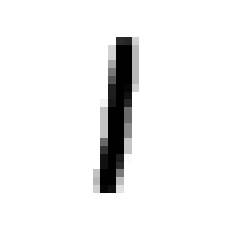

In [18]:
# Grab the image, by index:
img_idx = np.random.randint(low = 0, high = X_test.shape[0])
print('The image index taken is: ' + str(img_idx))

# Plot:
plt.imshow(X_test[img_idx], cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

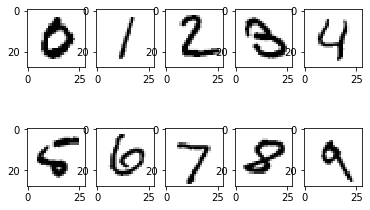

In [19]:
# Plot 10 of the Digits:
fig = plt.figure()

for i in range(10):
    img_idx = np.argwhere(y_test == i)[0]
    plottable_image = np.reshape(X_test[img_idx], (28, 28))
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(plottable_image, cmap = matplotlib.cm.binary)

## 5.4 - Dataset Preprocessing:

Transform the images into the required column vectors to be used as the input for the Neural Network.

In [20]:
# Flatten the data into a single row of vectors:
X_train, X_test = X_train.reshape(-1, 28 * 28), X_test.reshape(-1, 28 * 28)

# Check out the Pixel Values:
print("Pixel values between {} and {}".format(X_train.min(), X_train.max()))



Pixel values between 0 and 255


These Pixel values are normal integer values for images that has 8 bits per channel (uint8). These values are too big for some of the operations in the network. For example, given a too big input value, the sigmoid function may return nan value (or not a number) because of the exponential function it uses, which may __overflow__ with a large input value. So it better to __Normalise__ the data.

In [21]:
# Normalise the input data: scaling it between 0 and 1.
X_train, X_test = X_train / 255., X_test / 255.
print("Normalized pixel values between {} and {}".format(X_train.min(), X_train.max()))

# Inspect:
X_train.shape

Normalized pixel values between 0.0 and 1.0


(60000, 784)

In [22]:
# One-hot encode the labels:
y_train = np.eye(nb_classes)[y_train]

# Inpsect:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 5.5 - Implement the FEED-FORWARD network:

This section will wrap the layers of the network together with the addition of methods that will forward through the complete network. This network will then be able to predict the class from the input values and produce the predicted output vector.

In [23]:
# Import the required libraries:
import numpy as np
# from NeuralNetwork_Utilities import FullyConnectedLayer

In [24]:
# Define the Activation function: Sigmoid Activation function.

# This will apply the sigmoid function to the elements of x.
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

In [25]:
# Define the Simple Network model:

class SimpleNetwork_original(object):
    """ This builds a simple neural network model, that is a simple fully connected NN.
    Args:
        - num_inputs (int): The number of input values or input vector size.
        - num_outputs (int): The output vector size.
        - hidden_layers_sizes (list): A list of sizes for each of the hidden layer that is added to the NN.

    Attributes:
        - layers (list): The list of layers that would form this simple network model.
    
    """
    def __init__(self, num_inputs, num_outputs, hidden_layers_sizes = ((64, 32)) ):
        super().__init__()
        
        # Build the list of layers for the network:
        sizes = [num_inputs, *hidden_layers_sizes, num_outputs]
        self.layers = [
            FullyConnectedLayer_original(num_inputs = sizes[i], layer_size = sizes[i+1], activation_func = sigmoid) for i in range(len(sizes) - 1)
        ]
        
    def forward(self, x):
        """ Forward the input vector X through the layers of the network. """
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def predict(self, x):
        """ Compute the output that is corresponding to X, and returns the index of the largest output value. """
        estimations = self.forward(x)
        best_class = np.argmax(estimations)
        return best_class
    
    def evaluate_accuracy(self, X_val, y_val):
        """ Evaluates the network's accuracy based on the a validation dataset. """
        nb_corrects = 0
        for i in range(len(X_val)):
            pred_class = self.predict(X_val[i])
            if ( pred_class == y_val[i] ):
                nb_corrects += 1
                
        return nb_corrects / len(X_val)

## 5.6 - Test out the SimpleNetwork on the classification task:

Configuration of the SimpleNetwork:
- Consists of 2 hidden layers that are of sizes 64 and 32.
- This means that it is a 4 layer network, where the first hidden layer has 64 nodes.
- The second hidden layer has 32 nodes.


In [26]:
# Instantiate the network:
digits_simpleNetwork_classifier = SimpleNetwork_original(num_inputs = X_train.shape[1],
                                                num_outputs = nb_classes,
                                                hidden_layers_sizes= [64, 32])

In [27]:
# Evaluate the results of the model:
accuracy_digits = digits_simpleNetwork_classifier.evaluate_accuracy(X_val = X_test,
                                                             y_val = y_test)

print("accuracy = {:.2f}%".format(accuracy_digits * 100))

accuracy = 7.81%


### Observation: 

As it can be seen, the __accuracy__ of this simple network is around __10%__, which means that currently it is not that much better than randomly guessing the outcome. This is made possible because the network is defined by random parameters and has not been trained yet. Therefore, training the model to improve its resutls will be in the next section.

## 6 - Training the Neural Network:

Training a NN is the process of optimising its parameters to perform a specific task as it learns from available data. Once the training of the NN model and produces good performance, it can then be used on unseen data to produce good results. This is the goal of training a NN. Before diving right into its training, there are a few more concepts to explore.

## 6.1 - Types of Learning Strategies for the Model:

Overall, there are three types and these are:
1. Supervised Learning. (Discussed here)
2. Unsupervised Learning. (a short brief)
3. Reinforcement Learning. (a short brief)

### For Supervised Learning:

This type will train the NN model with training data that has ground truth labels (such as image classification), and it is where we supervise the training of the network by providing feedback for each prediction, or it can be described as a method of the model learning by repetition.

The process of training can be described as the following:
- Train the network on image data and collect the results of predicted labels. 
- Evaluate the network's loss which means comparing its predictions to that of the ground truth and determine how wrong these predictions are.
- Re-adjust the network's parameters iteratively to reduce it's loss. This means that the predictions will begin to become closer to the ground truth.
- Repeat this process until the network converges where it won't be able to improve its performance any further.

### For Unsupervised Learning:

This type of training for the NN model is where there are no ground truth information avaible for it to learn on. It computes its loss and learns based on its inputs and corresponding outputs. These types of models are clustering models, or compression models.

### For Reinforcement Learning:

This type involves an interactive strategy. It starts with an agent that will navigate through a certain environment, takes an action from a predefined list, and ends up in a new state. These states are then evaluated on a reward system where it can be poistive or negatice. Depending on this reward system, the agent will perform another action. At each instant, the NN would only be provieded with certain observations derived from the environment. Overall, the agent (or model) has to estimate a series of actions that results in the greatest end reward.

## 6.2 - Training Process:

The overall training process of the NN are usually the same for any of the previously mentioned learning methods. The network would be given training data, it then proceeds to make predictions and feedback is provided from evaluating how good its predictions are. The changes required are then used to update the parameters of the network. These steps are then repeated until the performance of the model can not improve any further.

The process can be broken down into the following steps (or concepts):
1. Loss evaluation.
2. Backpropagating the loss.
    - 

### 6.2.1 For Loss Evaluation:

The purposse of the loss function is to evaluate how the current weights of the network and its impacts on perforamnce. Generally the smaller the loss computed means that the parameters are better for the task. There are many types of loss function avaible but two of them will be introduced here. For more information on other functions: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

The __First__ Loss Function is the most common one -> __L2 Loss (or Sum of squeares function)__

This function computes the squared difference between each of the element of the predicted output vector $y_{i}$ and each of the element of the ground truth vector $y_{i}^{true}$. Alternatively, the mean can be computed rather than the sum, where for L2 loss, this would be the __mean square error (MSE)__. The L2 Loss formula can be seen as follows:

$L_{2}(y, y^{true}) = \sum_{i}(y_{i}^{true} - y_{i})^{2}$


The __Second__ Loss Function -> __L1 Loss__

This function will compute the absolute difference between the two vectors $(y_{i} and y_{i}^{true})$. Alternatively, the mean can be computed rather than the sum, where for L1 loss, this would be the __mean absolute error (MAE)__. The L1 Loss formula can be seen as follows:

$L_{1}(y, y^{true}) = \sum_{i}\left\lvert{y_{i}^{true} - y_{i}}\right\rvert$

The __Third__ Loss Function -> __BCE (binary Cross-Entropy function)__

This function will convert the predicted ouput probabilities into a logarithmic scale and then comparing these values to the expected value. The formula can be seen as follows:

$ BCE(y, y^{true}) = \sum_{i}[-y_{i}^{true}*log(y_{i}) + (1-y_{i}^{true})*log(1 - y_{i})]$

### 6.2.2 For Backpropagating the loss:

__Gradient Descent__:

Gradient descent (SD) is the optimisation algorithm that is used to determine if the parameter values utilised at its current training iteration would minimise the loss computed. The process of this SD algorithm can be described as follows:

At each of the training iteration, the derivatives of the loss function would be computed based on the current parameters of the network. Intuitively, this derivative can be used to hint which small changes to these paramters are required and should be applied. 

The following diagram describes gradient descent:

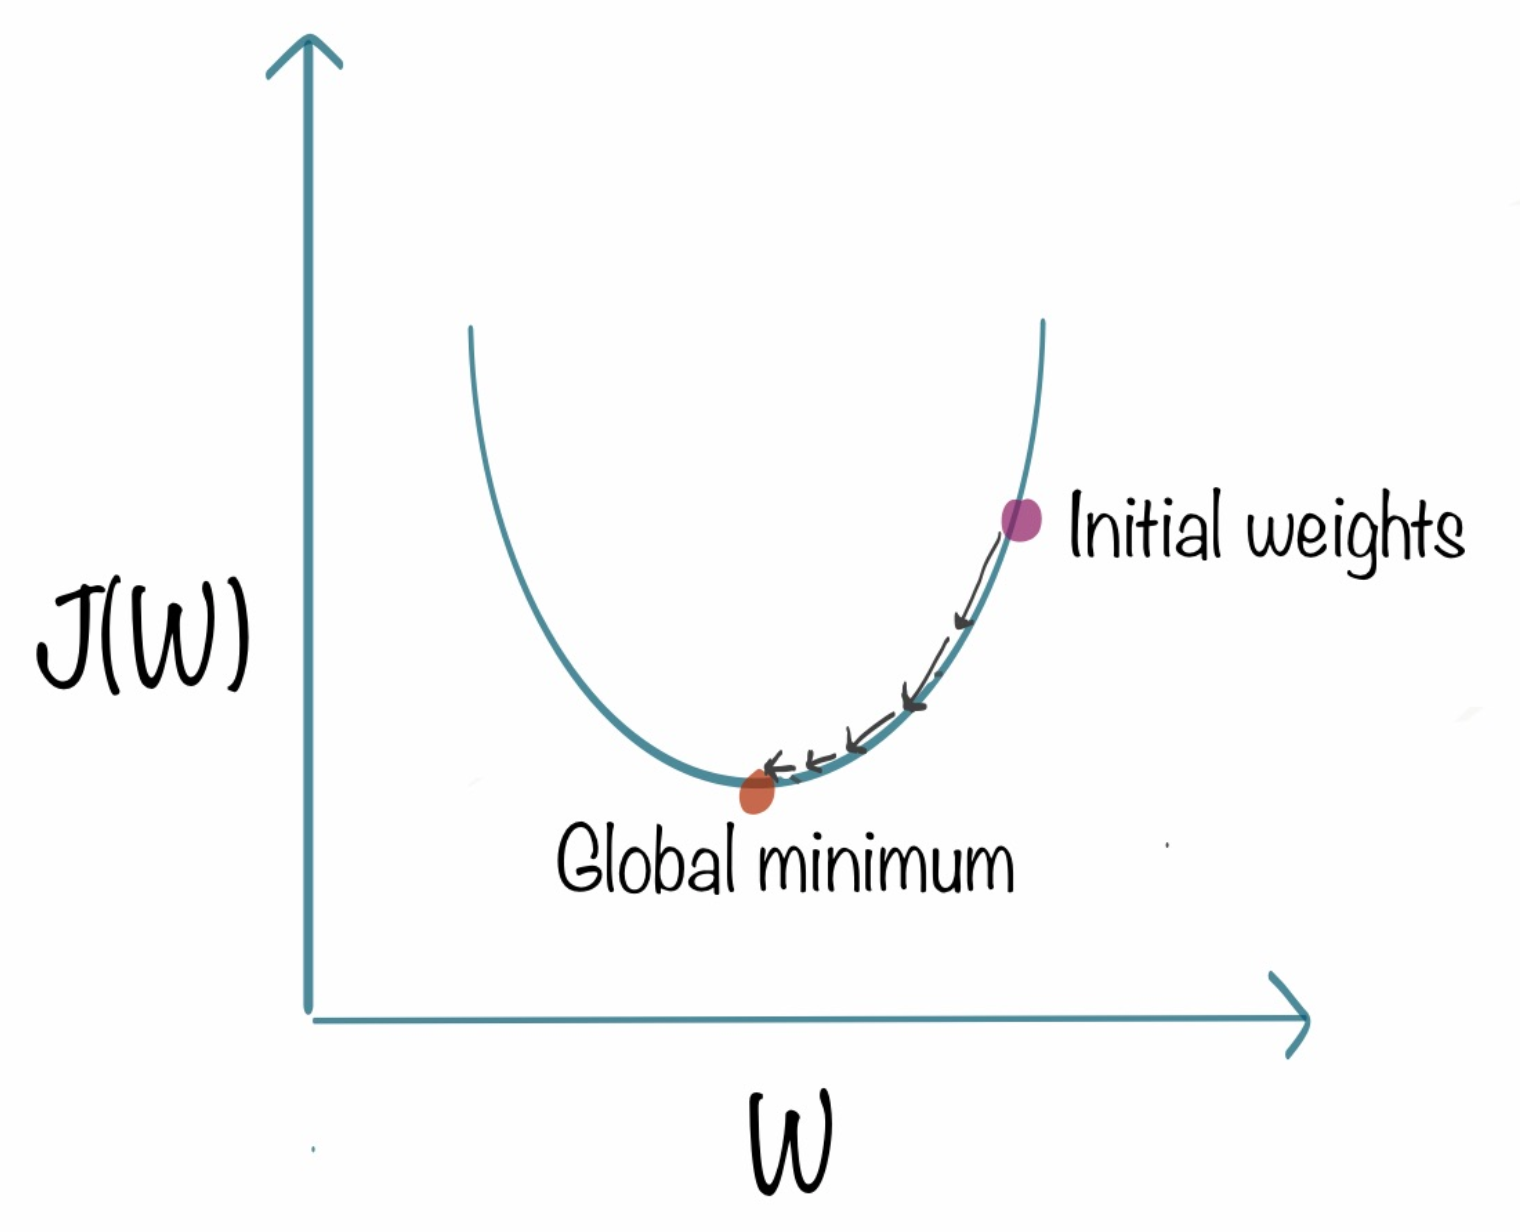

Image ref -> https://www.kdnuggets.com/2018/06/intuitive-introduction-gradient-descent.html


In [28]:
# Gradient Descent: 
display(Image(image_path + 'Gradient Descent.png', width=700, unconfined=True))
print('Image ref -> https://www.kdnuggets.com/2018/06/intuitive-introduction-gradient-descent.html')

In order to compute these derivatives, it is crucial to utilise the __Chain Rule__. It imforms that the derivatives w.r.t the parameters of the layer (k) would be computed by using the input and output values of the layer ($x_{k}, y_{k}$) and the derivatives that is from the following layer (k+1). Mathematically, in terms of the layer's wweights, it can be seen to be:

__Derivative calculation by using the Chain Rule__:

$ \frac{dL}{dW_{k}} = \frac{dL}{dy_{k}} \frac{dy_{k}}{dW_{k}} = \frac{dL}{dy_{k}} \frac{dy_{k}}{dz_{k}} \frac{dz_{k}}{dW_{k}} $

$ = \frac{dL}{dx_{k+1}} \frac{dL}{dz_{k}} \frac{(W_{k} * x_{k} + b_{k})}{dW_{k}} = l_{k+1}^{'} \odot f_{k}^{'} \frac{(W_{k} * x_{k} + b_{k})}{dW_{k}} = x_{k}^{T} \cdot (l_{k+1}^{'} \odot f_{k}^{'})$

Where,

$l_{k+1}^{'}$ is the computed derivative of layer k+1 w.r.t its inputs ($x_{k+1} = y_{k}$) \
$f_{k}^{'}$ is the derivative of the layer's activation function. \
$x^{T}$ is the transpose of x. \
$z_{k}$ is the computed weighted sum of layer k. This is also how the neurons are layered together. \
$\odot$ is element-wise multiplication between two matrices or vectors. (Hadamard product)

The derivatives w.r.t the bias of can be seen as:

$ \frac{dL}{db_{k}} = \frac{dL}{dy_{k}} \frac{dy_{k}}{db_{k}} = \frac{dL}{dy_{k}} \frac{dy_{k}}{dz_{k}} \frac{dz_{k}}{db_{k}} $

$ = l_{k+1}^{'} \odot f_{k}^{'} \frac{(W_{k} * x_{k} + b_{k})}{db_{k}} = (l_{k+1}^{'} \odot f_{k}^{'}) $

Lastly, the weights and derivatives of layer k+1 and derivative of the activation function have the resulting equation:

$ \frac{dL}{dx_{k}} = \frac{dL}{dy_{k}} \frac{dy_{k}}{dx_{k}} = \frac{dL}{dy_{k}} \frac{dy_{k}}{dz_{k}} \frac{dz_{k}}{dx_{k}} $

$ = l_{k+1}^{'} \odot f_{k}^{'} \frac{(W_{k} * x_{k} + b_{k})}{dx_{k}} = W_{k}^{T} \cdot (l_{k+1}^{'} \odot f_{k}^{'})$

__Hadamard product__:

$$\begin{pmatrix} a_{0} & a_{1} \\ a_{2} & a_{3} \end{pmatrix} \odot \begin{pmatrix}b_{0} & b_{1} \\ b_{2} & b_{3} \end{pmatrix} = \begin{pmatrix} a_{0} * b_{0} & a_{1} * b_{1} \\ a_{2} * b_{2} & a_{3} * b_{3} \end{pmatrix} $$

The above computations shows how each of the parameter affects the loss recursively, meaning layer by layer as it goes backwards. Therefore, to compute for the whole network, it can be seen to be, given the inputs, the data is forwarded through the network while at the same time, the derivatives w.r.t its parameters are calculated at the output and the resulting loss is propagated backwards through the network. (known as Backpropagation).

__Derivative of the L2 loss__:

The derivatives of the loss w.r.t the output values can be derived as,

$\frac{dL_{2}(y, y_{true})}{dy} = 2(y - y_{true})$

__Updating the Weights and Bias of the Network__:

Once the Loss derivatives were found w.r.t eaach of the parameter, it can be used to update the exisitng weights and bias accordingly,

$W_{k} \leftarrow W_{k} - \epsilon \frac{dL}{dW_{k}}$ , $b_{k} \leftarrow b_{k} - \epsilon \frac{dL}{db_{k}}$

Where, $\epsilon$ is the learning rate. 

The learning rate can be set with a value to increase the network's ability to update the weights in larger steps, however, steps that are too large may result in missing the local loss minimum and the network may not converge to a solution.

For more information: 
- https://ruder.io/optimizing-gradient-descent/
- https://machinelearningmastery.com/gradient-descent-for-machine-learning/
- http://neuralnetworksanddeeplearning.com/chap2.html

## 6.2.3 - Summary of the Training process:

1. Select "n" amount of training images at a time (out of the whole training set) and input them to the network.
2. Compute and backpropagate the loss. This is done by using chain rule to obtain the derivatives w.r.t the parameters of the layers.
3. Update the parameters with the corresponding derivative(s) values that is scaled according to the learning rate.
4. Repeat the steps 1 to 3 for the whole training set. Meaning the training is done in batches.
5. Repeat the steps 1 to 4 until the network converges to a solution, or set a limited number of iterations (epochs).

## 6.3 Code implementation:

This will require some update to the existing FullyConnectedLayer class and SimpleNetwork class.

### Define the Sigmoid Activation Function:

In [30]:
def sigmoid(x):
    y = 1/ (1 + np.exp(-x))
    return y

# Derivative of the Sigmoid funtion:
def derivated_sigmoid(y):
    return y * (1 - y)

### Define the Loss Function:

In [31]:
def loss_L2(pred, target):
    # opt. we divide by the batch size: by using " / pred.shape[0]"
    return np.sum(np.square(pred - target)) / pred.shape[0] 

# Derivative of the Loss funtion:
def derivated_loss_L2(pred, target):
    return 2 * (pred - target)

### Define the Binary Cross-Entropy Function:

In [32]:
def binary_cross_entropy(pred, target):
    return -np.mean(np.multiply(np.log(pred), target) + np.multiply(np.log(1 - pred), (1 - target)))
    
# Derivative of the binary_cross_entropy funtion:
def derivated_binary_cross_entropy(pred, target):
    return (pred - target) / (pred * (1 - pred))


### Update the FullyConnectedLayer class:

In [33]:
class FullyConnectedLayer(object):
    """ This builds a Fully Connected NN Layer.
    Args:
        - num_inputs (int): The number of input values or input vector size.
        - layer_size (int): The number of output values or output vector size.
        - activation_func (callable): The activation function for this layer.
    Attributes:
        - W (ndarray): Weight values for each of the input.
        - b (float): The bias value, which is added to the weighted sum.
        - size (int): The size of the layer or number of neurons present.
        - activation_func (callable): The activation function.
        - x (ndarray): Store the last provided input vector for backpropagation.
        - y (ndarray): The stored corresponding output for backpropagation.
        - derivated_activation_func (callable): The stored corresponding derivated act. func. for backpropagation.
        - dL_dW (ndarray): The derivative of the Loss function with respect to the weights W.
        - dL_db (ndarray): The derivative of the Loss function with respect to the bias b.
    """    
    def __init__(self, num_inputs, layer_size, activation_func, deriv_activation_func = None):
        super().__init__()
        
        # Random initialisation of the weight vector and bias:
        self.W = np.random.standard_normal((num_inputs, layer_size))
        self.b = np.random.standard_normal(layer_size)
        self.size = layer_size
        self.activation_func = activation_func
        self.deriv_activation_func = deriv_activation_func
        self.x, self.y = None, None
        self.dL_dW, self.dL_db = None, None
        
    def forward(self, x):
        """ This builds the Forward pass of the input signal through the neuron.
        Args:
            - x (ndarray): Input Vector with shape (batch_size, num_input)
        Returns:
            - activation (ndarray): The activation value (= y) with shape (batch_size, layer_size)
        
        """
        z = np.dot(x, self.W) + self.b
        
        # Store the last provided input & output vector for backpropagation
        self.y = self.activation_func(z)     
        self.x = x
        
        return self.y
    
    
    def backward(self, dL_dy):
        """ This builds the Backwards pass for backpropagating the loss. 
        It will compute all the derivatices and store them with w.r.t the layer parameters and it will also 
        return the computed loss w.r.t its inputs for further propagation.
        Args:
            - dL_dy (ndarray): The loss derivative w.r.t. the layer's output (dL/dy = l'_{k+1}).
        Returns:
            - dL_dx (ndarray): The loss derivative w.r.t. the layer's input (dL/dx).
        
        """
        # This is the derivative of the function (f'):
        dy_dz = self.deriv_activation_func(self.y)
        
        # This part follows -> dL/dz = dL/dy * dy/dz = l'_{k+1} * f'
        dL_dz = (dL_dy * dy_dz)
        
        dz_dw = self.x.T
        dz_dx = self.W.T
        
        # This part follows-> dz/db = d(W.x + b)/db = 0 + db/db = "ones"-vector
        dz_db = np.ones(dL_dy.shape[0])
        
        # Compute the derivatives w.r.t the layer's parameters and store them for opt. optimization:
        self.dL_dW = np.dot(dz_dw, dL_dz)
        self.dL_db = np.dot(dz_db, dL_dz)
        
        # Compute the derivative w.r.t the input, to be passed to the previous layers (their `dL_dy`):
        dL_dx = np.dot(dL_dz, dz_dx)
        
        return dL_dx
    
    def optimise(self, epsilon):
        """ This builds the optimisation step for the layer's parameters. 
        It also uses the stored derivative values for its computation.
        Args:
            - epsilon (float): Learning Rate for updating.
        
        """
        self.W -= epsilon * self.dL_dW
        self.b -= epsilon * self.dL_db


### Update the SimpleNetwork class:

In [34]:
# Define the Simple Network model:

class SimpleNetwork(object):
    """ This builds a simple neural network model, that is a simple fully connected NN.
    Args:
        - num_inputs (int): The number of input values or input vector size.
        - num_outputs (int): The output vector size.
        - hidden_layers_sizes (list): A list of sizes for each of the hidden layer that is added to the NN.
        - activation_func (callable): Activation function applied to all the layers.
        - derivated_activation_func (callable): The derivated activation function.
        - loss_func (callable): The Loss func. used to train the network.
        - derivated_loss_func (callable): The derivative of the loss func. that is used for backpropagation.
    Attributes:
        - layers (list): The list of layers that would form this simple network model.
        - loss_func (callable): The loss function to train this network.
        - derivated_loss_func (callable): The derivative of the loss func. that is used for backpropagation.
    """
    def __init__(self, num_inputs, num_outputs, hidden_layers_sizes = (64, 32), 
                activation_func = sigmoid, deriv_activation_func = derivated_sigmoid,
                loss_func = loss_L2, deriv_loss_func = derivated_loss_L2):
        super().__init__()
        
        # Build the list of layers for the network:
        layer_sizes = [num_inputs, *hidden_layers_sizes, num_outputs]
        self.layers = [
            FullyConnectedLayer(layer_sizes[i], 
                                layer_sizes[i+1], 
                                activation_func, 
                                deriv_activation_func) for i in range(len(layer_sizes) - 1)
        ]
        
        self.loss_func = loss_func
        self.deriv_loss_func = deriv_loss_func  
        
    def forward(self, x):
        """ Forward the input vector X through the layers of the network. 
        Args: 
            - x (ndarray): Input Vector with shape (batch_size, num_input)
        Returns:
            - activation (ndarray): The activation value (= y) with shape (batch_size, layer_size)
        
        """
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def predict(self, x):
        """ Compute the output that is corresponding to X, and returns the index of the largest output value. 
        Args: 
            - x (ndarray): Input vector with shape (1, num_inputs).
        Returns:
            - best_class (int): Predicted class ID.
        """
        estimations = self.forward(x)
        best_class = np.argmax(estimations)
        return best_class
    
    def backward(self, dL_dy):
        """ This builds the Backwards pass for backpropagating the loss through the layers. 
        This will require the .forward() method to be called.
        Args:
            - dL_dy (ndarray): The loss derivative w.r.t. the layer's output (dL/dy = l'_{k+1}).
        Returns:
            - dL_dx (ndarray): The loss derivative w.r.t. the layer's input (dL/dx).
        
        """
        # Iterates from the output layer to the input one
        for layer in reversed(self.layers):
            dL_dy = layer.backward(dL_dy)
        return dL_dy
    
    def optimise(self, epsilon):
        """ This builds the optimisation step for the layer's parameters. 
        It also uses the stored derivative values for its computation.
        Args:
            - epsilon (float): Learning Rate for updating.
        
        """
        # Note: the order doesn't matter here
        for layer in self.layers:
            layer.optimise(epsilon)
    
    def evaluate_accuracy(self, X_val, y_val):
        """ Evaluates the network's accuracy based on the a validation dataset.        
        Args:
            - X_val (ndarray): Validation dataset input.
            - y_val (ndarray): The corresponding ground-truth validation dataset.
        Returns:
            - accuracy (float): Network computed Accuracy (= number of correct predictions/dataset size).
        
        """
        nb_corrects = 0
        for i in range(len(X_val)):
            pred_class = self.predict(X_val[i])
            if ( pred_class == y_val[i] ):
                nb_corrects += 1
                
        return nb_corrects / len(X_val)
    
    def train(self, X_train, y_train, X_val = None, y_val = None,
             batch_size = 32, nb_epochs = 5, learning_rate = 1e-3, print_frequency = 20):
        """ This builds the Training method for the SimpleNetwork.
        Where for a given dataset and its ground truth labels, it will evaluate the current network accuracy.
        Args:
            - X_train (ndarray): Input training set.
            - y_train (ndarray): Corresponding ground truth for the training set.
            - X_val (ndarray): Input validation set.
            - y_val (ndarray): Corresponding ground truth for the validation set.
            - batch_size (int): The mini-batch size.
            - nb_epochs (int): The number of training epochs (iteration) over the whole dataset.
            - learning_rate (float): The learning rate to scale the derivatives for updating the weights and bias.
            - print_frequency (int): Frequency to print out the metrics (in epochs).
        Returns:
            - losses (list): The list of training losses for each of the epochs.
            - accuracies (list): The list of validation accuracy computed values for each of the epochs.
        """
        # Define the nb of batches per epoch: rounds the result down to the nearest whole number
        nb_batches_per_epoch = len(X_train) // batch_size
        
        # Check if there is a validation set and use it.
        do_validaiton = X_val is not None and y_val is not None
        
        # Define the list of losses and accuracies:
        losses, accuracies = [], []
        
        # Training: for each of the training epoch do...
        for i in range(nb_epochs):
            
            # for each batch composing the dataset
            epoch_loss = 0
            for b in range(nb_batches_per_epoch):
                # Get the current batch of the iteration.
                batch_idx_begin = b * batch_size
                batch_idx_end = batch_idx_begin + batch_size
                
                # Select the data based on the batch index:
                x = X_train[batch_idx_begin:batch_idx_end]
                targets = y_train[batch_idx_begin:batch_idx_end]
                
                # OPTIMISE on current batch ->
                # Forward pass:
                predictions = y = self.forward(x)
                
                # Compute the loss:
                L = self.loss_func(predictions, targets)
                
                # Compute the derivative of the loss:
                dL_dy = self.deriv_loss_func(predictions, targets)
                
                # Backwards pass: backpropagation.
                self.backward(dL_dy)
                
                # Update the weights and bias:
                self.optimise(learning_rate)
                
                # Update the current loss in this epoch:
                epoch_loss += L
                
            # Compute and update the loss:
            epoch_loss /= nb_batches_per_epoch
            
            # Update the list: losses list.
            losses.append(epoch_loss)
            
            # Compute and update the accuracy:
            if do_validaiton:
                accuracy = self.evaluate_accuracy(X_val, y_val)
                # Update the list: accuracies list.
                accuracies.append(accuracy)
            else:
                accuracy = np.NaN
                
            # Print out the losses and accuracies calc.
            if i % print_frequency == 0 or i == (nb_epochs - 1):
                print("Epoch {:4d}: training loss = {:.6f} | val accuracy = {:.2f}%".format(
                    i, epoch_loss, accuracy * 100)
                     )
        return losses, accuracies
                

## 7 - Test out the SimpleNetwork on the Dataset:

Here, the SimpleNetwork will be instantiated as a network with 2 hidden layers. It will take an input of flattened images and ouput a 10 value vector that represents the prediction of which image belonging to each of the class. The higher the ouptut value, means that the stronger the network believes that the image belongs to that certain class.

In [35]:
# Instantiating the Network:
mnist_classifier = SimpleNetwork(num_inputs = X_train.shape[1],
                                 num_outputs = nb_classes,
                                 hidden_layers_sizes = [64, 32])

## 7.1 - Get a Baseline of the Un-trained model performance:

Performance of the network can be found by calculating the loss over the training set and the accuracy reached over the test set.

In [36]:
# Get the predictions the model made from the training set:
predictions = mnist_classifier.forward(x = X_train)

# Compute the loss of the un-trained model:
loss_untrained = mnist_classifier.loss_func(pred = predictions,
                                            target = y_train)

# Compute the accuracy of the un-trained model:
acc_untrained = mnist_classifier.evaluate_accuracy(X_val = X_test, 
                                                   y_val = y_test)

# Print:
print("Untrained model performs with: training loss = {:.6f} | val accuracy = {:.2f}%".format(
    loss_untrained, acc_untrained * 100))

Untrained model performs with: training loss = 5.095677 | val accuracy = 9.96%


### 7.2 - Train the model and Validate it:

In [ ]:
losses, accuracies = mnist_classifier.train(X_train = X_train, 
                                            y_train = y_train, 
                                            X_val = X_test, 
                                            y_val = y_test, 
                                            batch_size = 32, 
                                            nb_epochs = 500, 
                                            learning_rate = 0.001, 
                                            print_frequency = 20)

### Observation:


## 7.3 - Plot the Lossess and Accuracies over the training epochs:

In [ ]:
losses, accuracies = [loss_untrained] + losses, [accuracy_untrained] + accuracies
fig, ax_loss = plt.subplots()

# Instantiate the FIRST axes:
color = 'red'
ax_loss.set_xlim([0, 510])
ax_loss.set_xlabel('Epochs')
ax_loss.set_ylabel('Training Loss', color=color)
ax_loss.plot(losses, color=color)
ax_loss.tick_params(axis='y', labelcolor=color)

# Instantiate a SECOND axes that shares the same x-axis
ax_acc = ax_loss.twinx()  
color = 'blue'
ax_acc.set_xlim([0, 510])
ax_acc.set_ylim([0, 1])
ax_acc.set_ylabel('Val Accuracy', color=color)
ax_acc.plot(accuracies, color=color)
ax_acc.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

### Observation:


## 7.4 - 

## 8 - Conclusion:

Please make sure that both the 'keras', 'tensorflow' and 'Python Imaging Library' packages haven been installed.

For AMD GPU: see https://plaidml.github.io/plaidml/docs/install to use it as the Backend for Keras.

In [ ]:
# For those who has AMD GPU and uses PlaidML for the Keras Backend: run the following code to use AMD GPU instead.
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"